In [2]:
import numpy as np
import pandas as pd
import re
import sqlite3
from sqlite3 import Error

import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
# For Natural Language Processing
import regex as re
import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

# For classification modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# For evaluation
from sklearn.metrics import confusion_matrix

# For wordclouds
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

pd.set_option('display.max_colwidth', -1)

# Text PreProcessing


In [3]:
wine_df = pd.read_csv('Cleaned_Wine_with_Reviewer.csv')

In [4]:
# Preprocessing function
def reviews_to_words(raw_review):
    
    # Get rid of accents
    unaccented = unidecode.unidecode(raw_review)
    
    # Get rid of punctuation
    letters_only = re.sub("[^a-zA-Z]", " ", unaccented)
    
    # Get all lowercase words
    words = letters_only.lower().split()
    
    # Instantiate and run Lemmatizer 
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # Remove stop words
    stops = set(stopwords.words('english'))
    stops.add('wine')
    stops.add('flavor')
    stops.add('flavors')
    stops.add('well')
    stops.add('drink')
    stops.add('palate')
    meaningful_words = [w for w in words if not w in stops]
    
    # Join into string and return the result.
    return(" ".join(meaningful_words))

In [5]:
# Clean all titles
total_reviews = wine_df.shape[0]
clean_reviews = []

for review in wine_df['description']:
    # Convert to words, then append to clean_train
    clean_reviews.append(reviews_to_words(review))

In [6]:
# Set features
features = wine_df['clean_review']

# Vectorize Text

In [7]:
vect = CountVectorizer()

# Fit the vectorizer on our corpus and transform
vect1 = vect.fit_transform(features)
#doc_word = vect.transform(features).transpose()
vect1 = pd.DataFrame(vect1.toarray(), columns=vect.get_feature_names())

In [8]:
vect1

,aa,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,abate,...,zoomed,zooming,zotovich,zu,zucca,zuccardi,zucchini,zull,zweigelt,zwiegelt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
vect2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

# Fit the vectorizer on our corpus and transform
vector2 = vect2.fit_transform(features)
#doc_word2 = vect2.transform(features).transpose()
vector2 = pd.DataFrame(vector2.toarray(), columns=vect2.get_feature_names())

In [10]:
vector2

,aa,aa privat,aand,aand tingling,aaron,aaron jackson,aaron pott,aaron walker,ab,ab ovo,...,zweigelt lagrein,zweigelt lemberger,zweigelt light,zweigelt merlot,zweigelt perennial,zweigelt pinot,zweigelt smooth,zweigelt soft,zwiegelt,zwiegelt cabernet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
tfidf_uni = tfidf1.fit_transform(features)
#X_train_tfidf1 = tfidf1.transform(features).transpose()

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
tfidf_bi = tfidf2.fit_transform(features)
#X_train_tfidf2 = tfidf2.transform(features).transpose()

In [12]:
tfidf_df1 = pd.DataFrame(tfidf_uni.toarray(),columns=tfidf1.get_feature_names())
tfidf_df1

,aa,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,abate,...,zoomed,zooming,zotovich,zu,zucca,zuccardi,zucchini,zull,zweigelt,zwiegelt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
tfidf_df2 = pd.DataFrame(tfidf_bi.toarray(),columns=tfidf2.get_feature_names())
tfidf_df2

,aa,aa privat,aand,aand tingling,aaron,aaron jackson,aaron pott,aaron walker,ab,ab ovo,...,zweigelt lagrein,zweigelt lemberger,zweigelt light,zweigelt merlot,zweigelt perennial,zweigelt pinot,zweigelt smooth,zweigelt soft,zwiegelt,zwiegelt cabernet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

# LSA

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
doc_word = vect.transform(features)

doc_word.shape

(86213, 24356)

In [15]:
lsa = TruncatedSVD(15)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.01084987, 0.0194046 , 0.01496449, 0.01464036, 0.01085165,
       0.01024524, 0.00920664, 0.00869613])

In [16]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"],
             columns=vect.get_feature_names())
topic_word

,aa,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,abate,...,zoomed,zooming,zotovich,zu,zucca,zuccardi,zucchini,zull,zweigelt,zwiegelt
component_1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
component_2,-0.0,-0.0,0.000,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.000,0.0
component_3,-0.0,-0.0,0.000,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.000,0.0
component_4,-0.0,-0.0,0.000,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.000,0.0
component_5,-0.0,-0.0,-0.000,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.000,-0.0
component_6,-0.0,0.0,0.000,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.000,0.0
component_7,-0.0,0.0,0.001,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.001,0.0
component_8,-0.0,-0.0,-0.000,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.000,-0.0


In [17]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [18]:
display_topics(lsa, vect.get_feature_names(), 10)


Topic  0
fruit, aromas, black, tannins, cherry, acidity, ripe, red, spice, berry

Topic  1
black, cherry, tannins, aromas, plum, berry, dark, cabernet, pepper, blackberry

Topic  2
fruit, black, dark, rich, cabernet, wood, ripe, barrel, aging, dense

Topic  3
acidity, ripe, tannins, fruits, rich, black, full, red, firm, fruity

Topic  4
red, berry, fruit, tannins, cherry, acidity, raspberry, bright, light, herb

Topic  5
black, cherry, acidity, nose, fresh, light, pepper, bright, red, white

Topic  6
cabernet, blend, sauvignon, merlot, franc, notes, red, verdot, petit, syrah

Topic  7
cherry, full, bodied, red, notes, ripe, nose, medium, texture, light


Hmm not sure what these topics could be about. Let's try NMF

# NMF

In [19]:
nmf_vect = CountVectorizer()

# Fit the vectorizer on our corpus and transform
nmf_doc_word = nmf_vect.fit_transform(features)
nmf_vect_df = pd.DataFrame(nmf_doc_word.toarray(), columns=nmf_vect.get_feature_names())


In [20]:
nmf_vect_df

,aa,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,abate,...,zoomed,zooming,zotovich,zu,zucca,zuccardi,zucchini,zull,zweigelt,zwiegelt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.decomposition import NMF

nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(nmf_doc_word)

/Users/isaacnwang/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [22]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"],
             columns = nmf_vect.get_feature_names())
topic_word

,aa,aand,aaron,ab,abacela,abadal,abadia,abandon,abandoned,abate,...,zoomed,zooming,zotovich,zu,zucca,zuccardi,zucchini,zull,zweigelt,zwiegelt
component_1,0.0,0.0,0.002,0.0,0.000,0.000,0.0,0.001,0.0,0.000,...,0.000,0.001,0.000,0.0,0.0,0.000,0.0,0.000,0.001,0.000
component_2,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.001,0.0,0.000,...,0.000,0.000,0.001,0.0,0.0,0.000,0.0,0.001,0.000,0.000
component_3,0.0,0.0,0.000,0.0,0.002,0.000,0.0,0.000,0.0,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.001,0.000
component_4,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.001,0.000
component_5,0.0,0.0,0.001,0.0,0.001,0.000,0.0,0.001,0.0,0.000,...,0.001,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.002,0.000
component_6,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.000,0.000,0.000,0.0,0.0,0.001,0.0,0.000,0.000,0.000
component_7,0.0,0.0,0.007,0.0,0.001,0.002,0.0,0.000,0.0,0.000,...,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.008,0.001
component_8,0.0,0.0,0.000,0.0,0.000,0.001,0.0,0.000,0.0,0.001,...,0.000,0.001,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000


In [23]:
display_topics(nmf_model, nmf_vect.get_feature_names(), 10)


Topic  0
black, cherry, tannins, pepper, dark, nose, firm, licorice, plum, blackberry

Topic  1
apple, nose, fresh, lemon, citrus, white, notes, pear, dry, light

Topic  2
fruit, oak, barrel, dark, spice, wood, shows, vineyard, stone, balance

Topic  3
acidity, fruits, ripe, tannins, rich, fruity, character, crisp, texture, ready

Topic  4
red, cherry, tannins, berry, raspberry, light, bright, rose, fresh, nose

Topic  5
aromas, berry, plum, oak, spice, herbal, vanilla, feels, lead, blackberry

Topic  6
cabernet, blend, sauvignon, merlot, franc, verdot, petit, syrah, malbec, notes

Topic  7
full, bodied, ripe, rich, texture, oak, medium, blackberry, like, vanilla


Still not the most intuitive topics. Maybe some topics talking about white vs. red wines. Let me make a dataframe of each document and the componetns that make up each document.  

In [24]:
H = pd.DataFrame(doc_topic.round(8),
             index = features,
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8"])
H

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8
clean_review,,,,,,,,
ripe fruity smooth still structured firm tannins filled juicy red berry fruits freshened acidity already able although certainly better,0.002225,0.000000,0.000000,0.167551,0.094616,0.008872,0.000000,0.000000
tart snappy lime flesh rind dominate green pineapple pokes crisp acidity underscoring stainless steel fermented,0.000000,0.057480,0.000000,0.056872,0.000000,0.000000,0.000000,0.000000
pineapple rind lemon pith orange blossom start aromas bit opulent notes honey drizzled guava mango giving way slightly astringent semidry,0.000000,0.069479,0.000360,0.000000,0.000000,0.067353,0.000000,0.000268
much like regular bottling comes across rather rough tannic rustic earthy herbal characteristics nonetheless think pleasantly unfussy country good companion hearty winter stew,0.001272,0.008765,0.005635,0.001368,0.001065,0.023230,0.001954,0.011108
dry restrained spice profusion balanced acidity firm texture much food,0.000838,0.014338,0.002259,0.085886,0.000000,0.008452,0.000000,0.000000
...,...,...,...,...,...,...,...,...
notes honeysuckle cantaloupe sweeten deliciously feather light spatlese intensely juicy quenching streams tart tangerine grapefruit acidity yet wraps kiss honey peach,0.000000,0.077708,0.000000,0.053597,0.007920,0.000000,0.000000,0.000000
citation given much decade bottle age prior release means pre cellared ing peak baked cherry cocoa coconut combine gracefully soft secondary fruit compote highlights,0.013359,0.000000,0.077799,0.006503,0.037662,0.000341,0.002744,0.003277
drained gravel soil gives crisp dry character ripe fruity although spice subdued favor serious structure age couple years,0.000327,0.014397,0.006644,0.081144,0.000000,0.005722,0.000000,0.023674


# K Means Clustering

In [14]:
X = vect2.fit_transform(features)

In [16]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X)

/Users/isaacnwang/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=15, n_init=5, n_jobs=-1)

In [18]:
words = vect2.get_feature_names()
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : attractive, acidic, aromas, blend tempranillo, black fruit, attractive shows, fruit aromas, lemony oak, gritty, grenache
1 : lemon, dry, lime, notes, acidity, fresh, riesling, nose, peach, citrus
2 : aromas, fruit, spice, cherry, tannins, notes, bodied, black, oak, vanilla
3 : tannins, cherry, aromas, black, alongside, berry, black cherry, spice, red, pepper
4 : tannins, fruits, black, acidity, fruit, ripe, firm, rich, structure, wood
5 : nose, fruit, black, red, aromas, bottling, cherry, plum, notes, shows
6 : ripe, fruit, acidity, rich, texture, fruits, soft, character, bodied, red
7 : acidity, crisp, fruity, fresh, red, light, fruits, texture, bright, fruit
8 : cabernet, sauvignon, cabernet sauvignon, blend, merlot, franc, tannins, fruit, cabernet franc, aromas
9 : aromas, berry, plum, herbal, oak, notes, feels, fruit, spice, red
10 : cabernet sauvignon, cabernet, oak, sauvignon petit, berry, petit, petit verdot, nose, malbec cabernet, verdot
11 : black, cherry, black cherry, fr

Now that I have my top keywords, I'm going to join the cluster number to my original dataframe to see if I can see any obvious patterns.

In [19]:
wine_df['cluster'] = kmeans.labels_

In [20]:
wine_df

,Unnamed: 0,country,description,price,province,title,variety,winery,color,taster_name,clean_review,cluster
0,0,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",15,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red,Roger Voss,ripe fruity smooth still structured firm tannins filled juicy red berry fruits freshened acidity already able although certainly better,4
1,1,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",14,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,white,Paul Gregutt,tart snappy lime flesh rind dominate green pineapple pokes crisp acidity underscoring stainless steel fermented,7
2,2,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",13,Michigan,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,white,Alexander Peartree,pineapple rind lemon pith orange blossom start aromas bit opulent notes honey drizzled guava mango giving way slightly astringent semidry,1
3,3,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",65,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,red,Paul Gregutt,much like regular bottling comes across rather rough tannic rustic earthy herbal characteristics nonetheless think pleasantly unfussy country good companion hearty winter stew,12
4,4,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",24,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,white,Roger Voss,dry restrained spice profusion balanced acidity firm texture much food,7
...,...,...,...,...,...,...,...,...,...,...,...,...
86208,108307,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",28,Mosel,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),white,Anna Lee C. Iijima,notes honeysuckle cantaloupe sweeten deliciously feather light spatlese intensely juicy quenching streams tart tangerine grapefruit acidity yet wraps kiss honey peach,1
86209,108308,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",75,Oregon,NaN,Pinot Noir,Citation,red,Paul Gregutt,citation given much decade bottle age prior release means pre cellared ing peak baked cherry cocoa coconut combine gracefully soft secondary fruit compote highlights,12
86210,108309,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2017.",30,Alsace,NaN,Gewürztraminer,Domaine Gresser,white,Roger Voss,drained gravel soil gives crisp dry character ripe fruity although spice subdued favor serious structure age couple years,6
86211,108310,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still devel

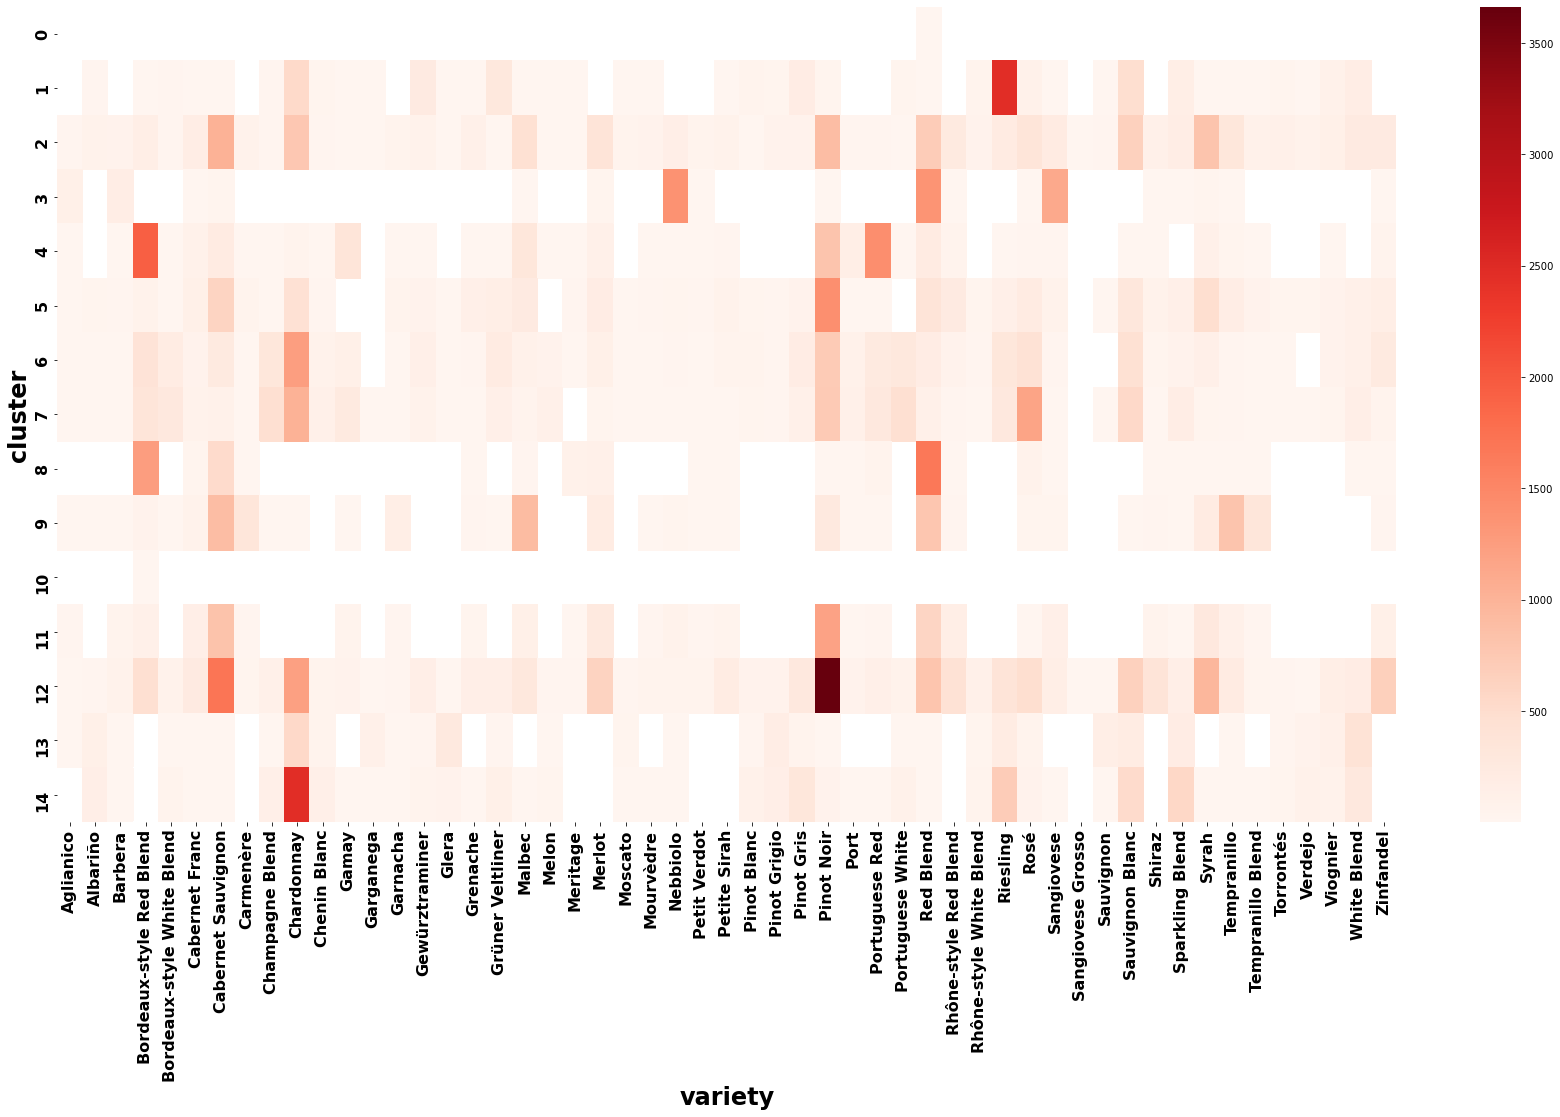

In [22]:
import matplotlib.pyplot as plt


clusters = wine_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

I was hoping to see one wine variation more prevalant than others in my clusters. Not really the case here.

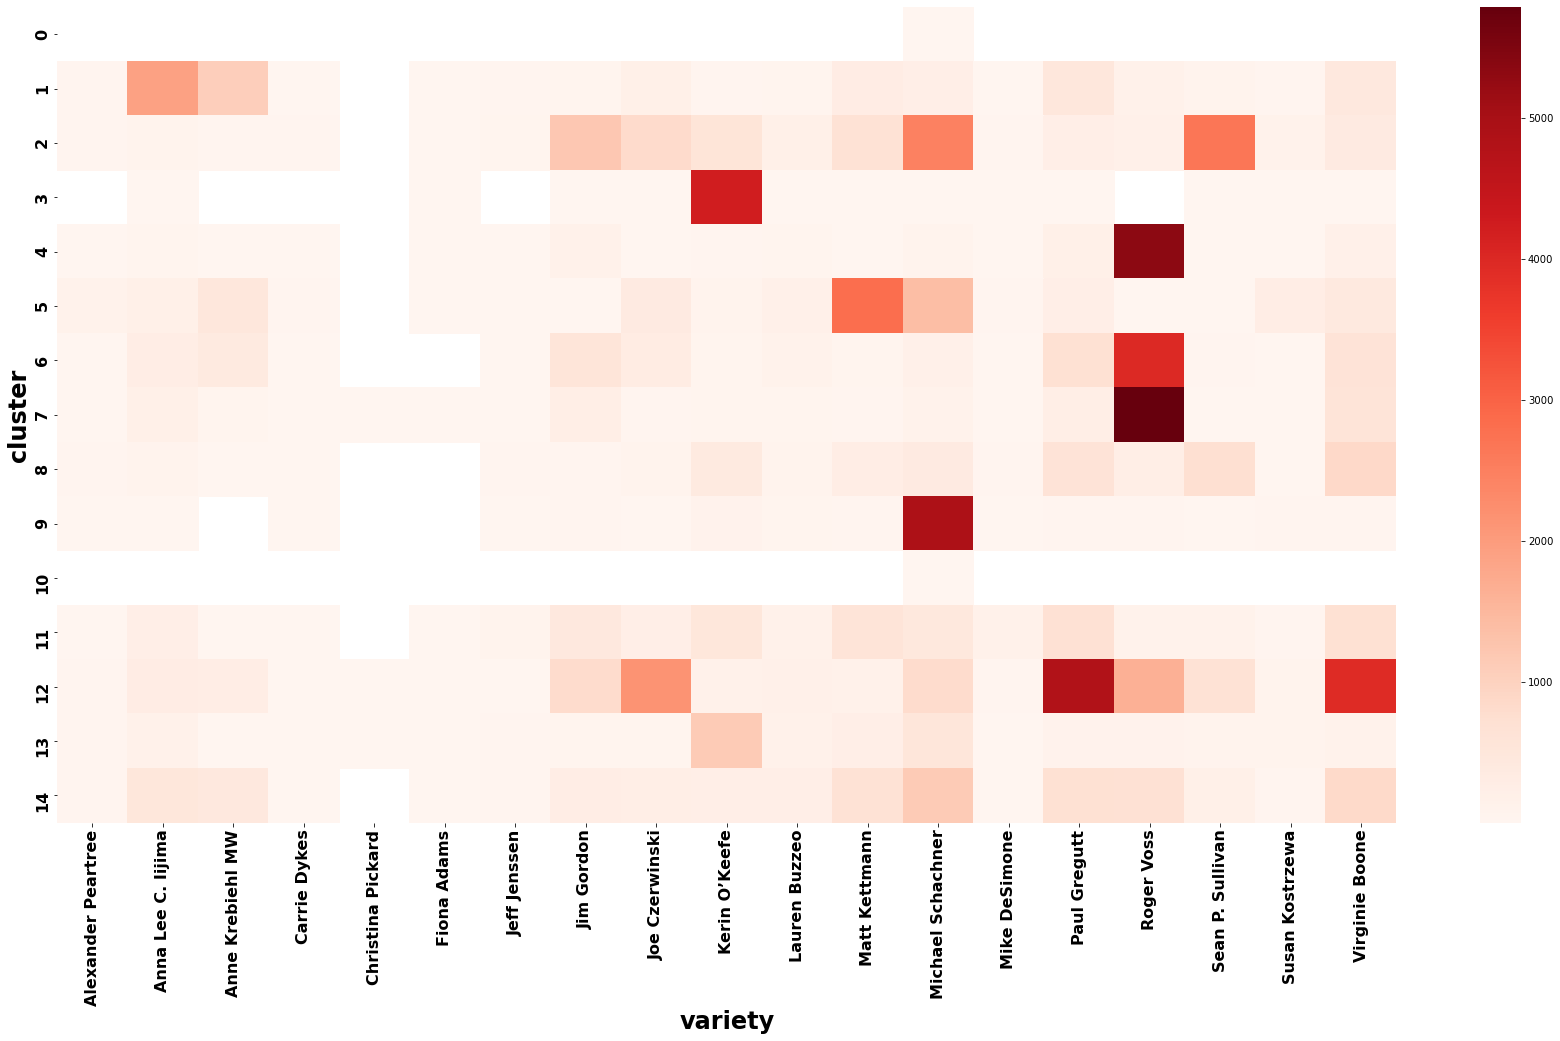

In [24]:
clusters = wine_df.groupby(['cluster', 'taster_name']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'taster_name'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

No real pattern with wine reviewer either. Maybe visualizations will help?

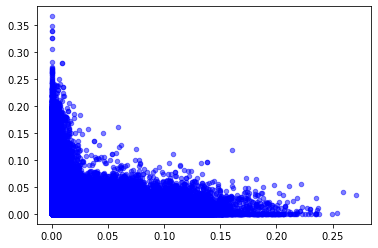

In [41]:
import matplotlib.pyplot as plt

display_cluster(doc_topic)

IndexError: string index out of range

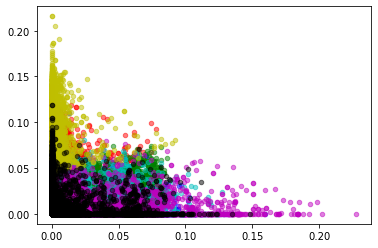

In [42]:
from sklearn.cluster import KMeans


num_clusters = 15
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic,km,num_clusters)

Not too much insight. Let's try LDA next